# Data Project - Stock Market Analysis 

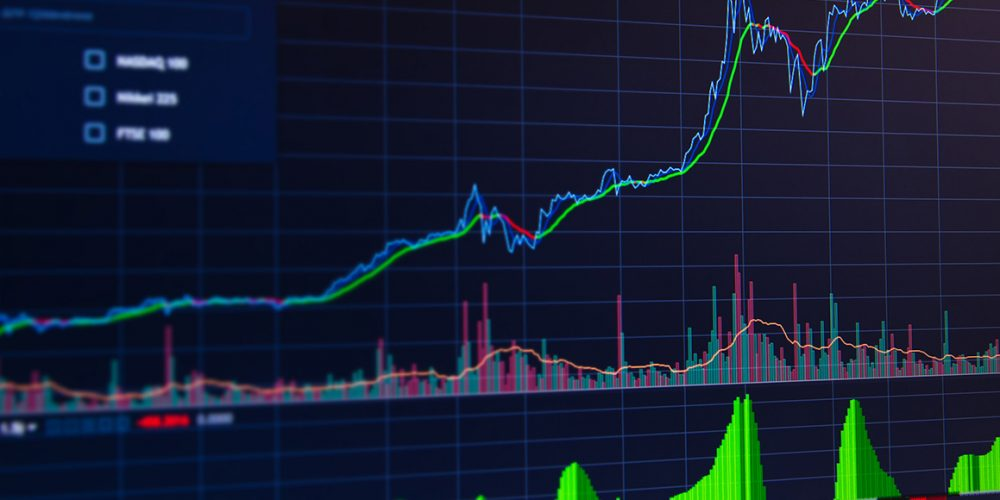


We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    4.) How much value do we put at risk by investing in a particular stock?
    5.) Technical indicators
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using SVR)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
# library using for data visualization

import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

#  reading stock data from yahooFinance
from pandas_datareader.data import DataReader
import yfinance as yf


# using plotlib for draw  graphs  
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# setup layout for  library go 
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))
colors=px.colors.qualitative.Plotly
# set up style for library searborn , matplotlib 
sns.set_style("whitegrid") 
plt.style.use("fivethirtyeight") 

In [2]:
# The tech stocks we'll use for this analysis
company_list = ['VNM',  'NVL']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in company_list:
    globals()[stock] = yf.download(stock, "2018-01-01", "2023-04-24")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [3]:
company_list = [VNM, NVL]
company_name = ["VNM", "NVL"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [38]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,company_name,Daily Return,EMA_9,EMA_20,EMA_50,EMA_100,EMA_200,RSI,MACD,MACD_signal
0,2018-02-20,18.650000,19.030001,18.530001,18.879999,18.246244,764400,VNM,-0.001058,18.470144,18.597796,18.664665,18.684347,18.693390,46.733659,-0.090287,-0.208802
1,2018-02-21,18.900000,19.000000,18.639999,18.639999,18.014303,274200,VNM,-0.012712,18.512302,18.614393,18.673282,18.691096,18.699343,41.135972,-0.070225,-0.177753
2,2018-02-22,18.830000,18.940001,18.639999,18.750000,18.120609,207900,VNM,0.005901,18.525399,18.615883,18.671977,18.689375,18.697499,43.554013,-0.045452,-0.148806
3,2018-02-23,18.879999,19.139999,18.799999,19.120001,18.478189,362800,VNM,0.019733,18.548377,18.623602,18.674978,18.691369,18.699089,55.405414,0.002400,-0.116333
4,2018-02-26,19.120001,19.270000,19.110001,19.240000,18.594160,339400,VNM,0.006276,18.606722,18.651892,18.691778,18.705148,18.711515,70.187766,0.048917,-0.081361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,2023-04-17,12.050000,12.110000,12.050000,12.110000,12.110000,222800,VNM,0.002483,12.129326,12.053237,12.291004,13.221815,14.666161,51.851834,0.095846,0.109615
1298,2023-04-18,12.190000,12.200000,12.110000,12.130000,12.130000,802000,VNM,0.001652,12.127393,12.055940,12.287454,13.210807,14.653427,52.439020,0.084605,0.104613
1299,2023-04-19,12.020000,12.070000,11.950000,11.960000,11.960000,716100,VNM,-0.014015,12.127654,12.059466,12.284367,13.200106,14.640856,39.784983,0.061273,0.095945
1300,2023-04-20,11.920000,12.010000,11.910000,11.980000,11.980000,553400,VNM,0.001672,12.110889,12.054730,12.278007,13.187828,14.627501,41.052635,0.043890,0.085534


Checking Null/NA value and remove it

In [4]:
# kiem tra xem co du lieu is null
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

Drop NAN value

In [5]:
df.dropna(inplace=True)
df.isna().any()

Open            False
High            False
Low             False
Close           False
Adj Close       False
Volume          False
company_name    False
dtype: bool

Import Reliance dataset  using YahooFinance

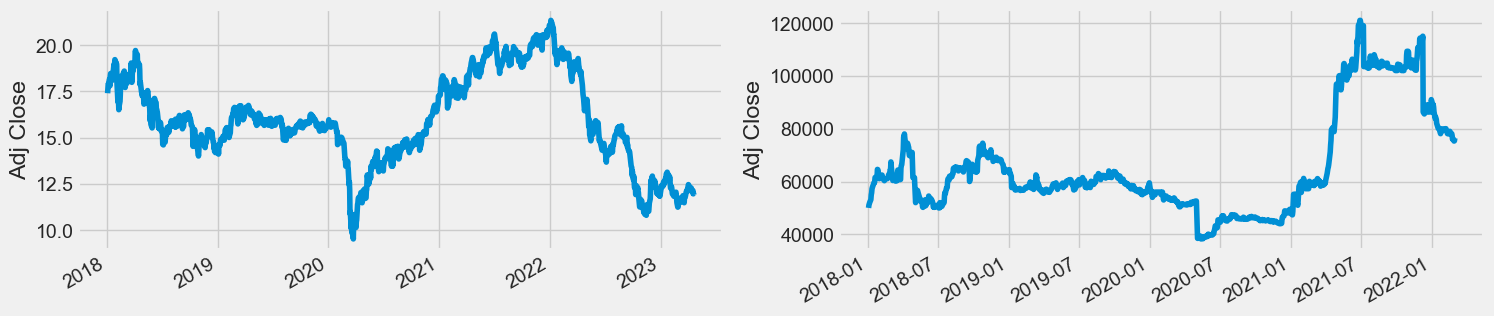

In [6]:
# Let's see a historical view of the closing price
# 24,15
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None) 
    
plt.tight_layout()

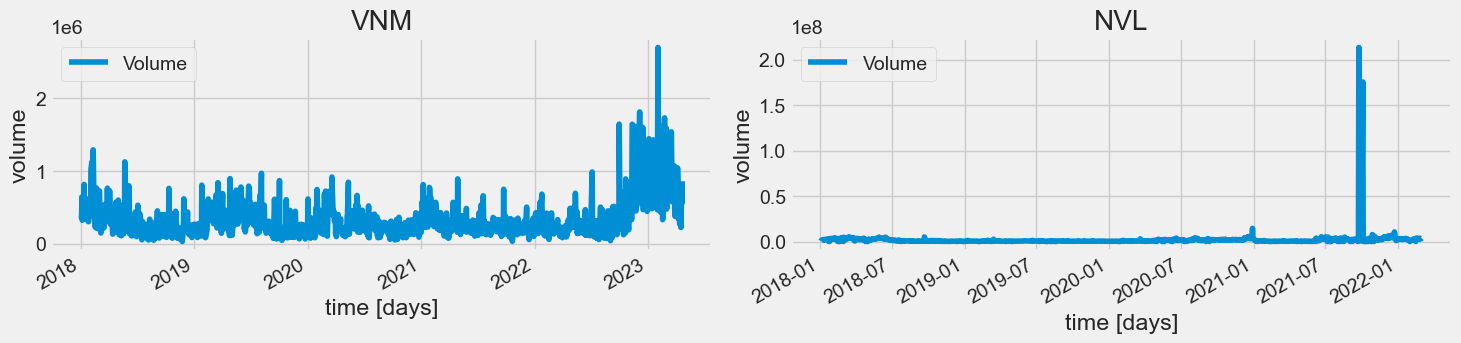

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.title(company['company_name'][0])
    plt.xlabel('time [days]')
    plt.ylabel('volume')
    plt.legend(loc='best');

plt.tight_layout()

# 2. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

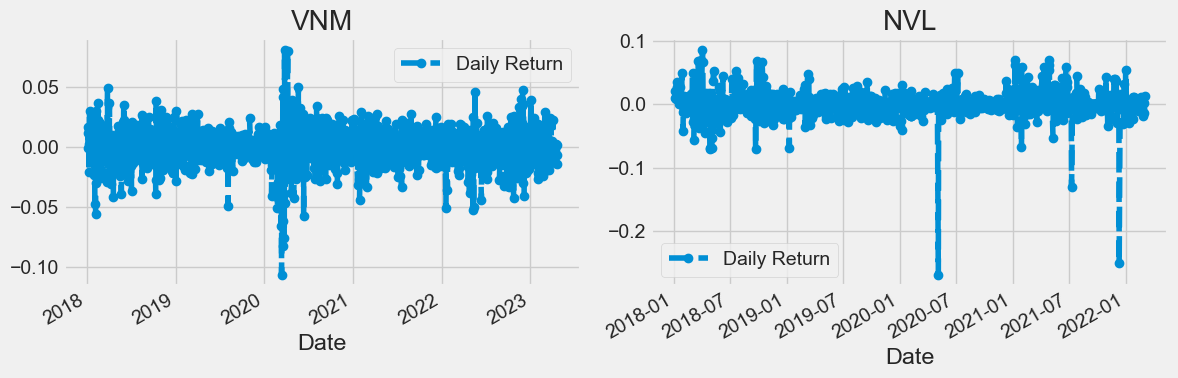

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=2,squeeze=False)
fig.set_figheight(4)
fig.set_figwidth(12)

VNM['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('VNM')

NVL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NVL')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\hp_tp\AppData\Local\Temp\ipykernel_15808\20126117.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(),bins=100, color='purple')
C:\Users\hp_tp\AppData\Local\Temp\ipykernel_15808\20126117.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily 

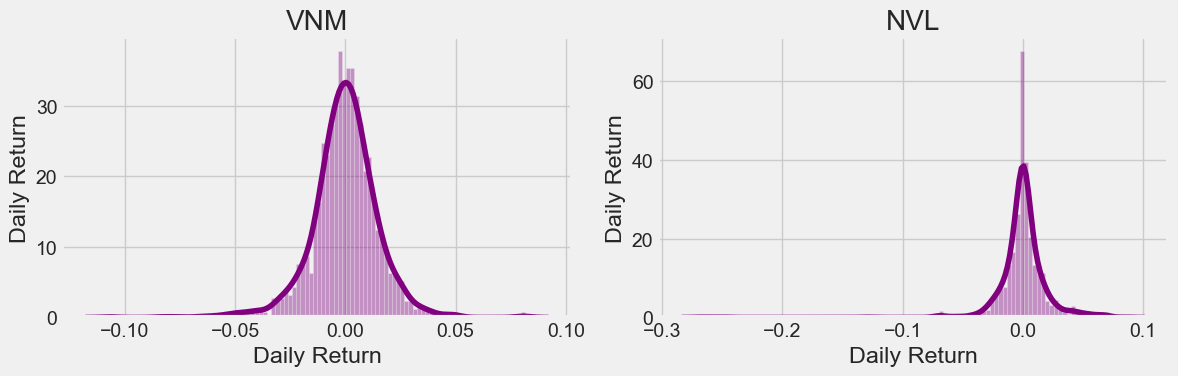

In [9]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(),bins=100, color='purple')
    # company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. How much value do we put at risk by investing in a particular stock?

In [10]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

closing_df = pdr.get_data_yahoo(company_name, start='2018-01-01', end='2022-01-01')['Adj Close']



[*********************100%***********************]  2 of 2 completed


In [11]:
# Make a new tech returns DataFrame
company_list = closing_df.pct_change()
company_list.head()

,NVL,VNM
Date,,
2018-01-02,NaN,NaN
2018-01-03,0.021374,0.016666
2018-01-04,0.010464,0.011476
2018-01-05,0.008875,-0.001081
2018-01-08,0.020528,0.015143


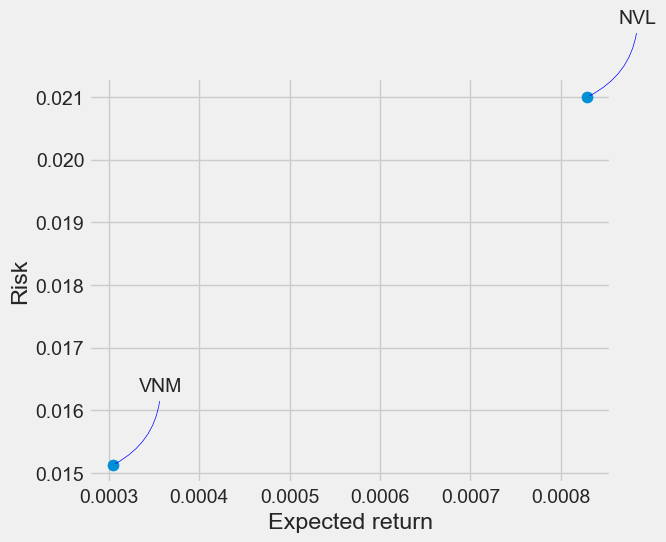

In [12]:
rets = company_list.dropna()

area = np.pi * 20

plt.figure(figsize=(6, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

# 5. Technical indicators

In [13]:
VNM.reset_index(inplace = True)

In [14]:



def print_chart (df):
    df['EMA_9'] = df['Close'].ewm(9).mean().shift()
    df['EMA_20'] = df['Close'].ewm(20).mean().shift()
    df['EMA_50'] = df['Close'].ewm(50).mean().shift()
    df['EMA_100'] = df['Close'].ewm(100).mean().shift()
    df['EMA_200'] = df['Close'].ewm(200).mean().shift()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_9, name='EMA 9'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_20, name='EMA 20'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_50, name='EMA 50'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_100, name='EMA 100'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.EMA_200, name='EMA 200'))
    fig.add_trace(go.Scatter(x=df.Date, y=df.Close, name='Close', opacity=0.2))
    fig.show()

print_chart(VNM)


In [15]:
VNM.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,company_name,Daily Return,EMA_9,EMA_20,EMA_50,EMA_100,EMA_200
1325,2023-04-10,12.27,12.39,12.19,12.30,12.30,338200,VNM,0.000814,12.061342,12.003532,12.296723,13.272050,14.727570
1326,2023-04-11,12.39,12.39,12.24,12.29,12.29,789400,VNM,-0.000813,12.085208,12.017649,12.296788,13.262425,14.715476
1327,2023-04-12,12.29,12.36,12.26,12.28,12.28,347100,VNM,-0.000814,12.105687,12.030618,12.296655,13.252797,14.703393
1328,2023-04-13,12.22,12.24,12.17,12.24,12.24,268600,VNM,-0.003257,12.123118,12.042494,12.296328,13.243166,14.691320
1329,2023-04-14,12.14,12.15,12.01,12.08,12.08,733300,VNM,-0.013072,12.134807,12.051899,12.295224,13.233233,14.679109
1330,2023-04-17,12.05,12.11,12.05,12.11,12.11,222800,VNM,0.002483,12.129326,12.053237,12.291004,13.221815,14.666161
1331,2023-04-18,12.19,12.20,12.11,12.13,12.13,802000,VNM,0.001652,12.127393,12.055940,12.287454,13.210807,14.653427
1332,2023-04-19,12.02,12.07,11.95,11.96,11.96,716100,VNM,-0.014015,12.127654,12.059466,12.284367,13.200106,14.640856
1333,2023-04-20,11.92,12.01,11.91,11.98,11.98,553400,VNM,0.001672,12.110889,12.054730,12.278007,13.187828,14.627501
1334,2023-04-21,11.90,11.90,11.85,11.90,11.90,859000,VNM,-0.006678,12.097800,12.051171,12.272164,13.175869,14.614312


RSI =>  Relative Strength Indicator

In [16]:
def releatvive_strength_index(df, n = 14):
    close = df['Close']
    delta = close.diff() # lay nhung gia tri uniquy trong  du lieu close 
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0 ] = 0
    pricesDown[pricesDown >  0 ] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1 + rs))
    return rsi;


VNM['RSI'] = releatvive_strength_index(VNM).fillna(0)
fig = go.Figure(go.Scatter(x = VNM.Date, y = VNM.RSI, name="RSI"))
fig.show()



MACD =>  Moving Average Convergence Divergence 

In [17]:
# df = AAPL.copy()
EMA_12 = pd.Series(VNM['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(VNM['Close'].ewm(span=26, min_periods=26).mean())
VNM['MACD'] = pd.Series(EMA_12 - EMA_26)
VNM['MACD_signal'] = pd.Series(VNM.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=VNM.Date, y=VNM.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=VNM.Date, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=VNM.Date, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=VNM.Date, y=VNM['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=VNM.Date, y=VNM['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()

In [18]:
df = VNM.iloc[33:].copy()
df.index = range(len(df))

In [19]:


dataset = df[['Volume','Daily Return','EMA_9','EMA_20','EMA_50','EMA_100','EMA_200','RSI','MACD','MACD_signal','Close']]
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
dataset



,Volume,Daily Return,EMA_9,EMA_20,EMA_50,EMA_100,EMA_200,RSI,MACD,MACD_signal,Close
0,764400,-0.001058,18.470144,18.597796,18.664665,18.684347,18.693390,46.733659,-0.090287,-0.208802,18.879999
1,274200,-0.012712,18.512302,18.614393,18.673282,18.691096,18.699343,41.135972,-0.070225,-0.177753,18.639999
2,207900,0.005901,18.525399,18.615883,18.671977,18.689375,18.697499,43.554013,-0.045452,-0.148806,18.750000
3,362800,0.019733,18.548377,18.623602,18.674978,18.691369,18.699089,55.405414,0.002400,-0.116333,19.120001
4,339400,0.006276,18.606722,18.651892,18.691778,18.705148,18.711515,70.187766,0.048917,-0.081361,19.240000
...,...,...,...,...,...,...,...,...,...,...,...
1297,222800,0.002483,12.129326,12.053237,12.291004,13.221815,14.666161,51.851834,0.095846,0.109615,12.110000
1298,802000,0.001652,12.127393,12.055940,12.287454,13.210807,14.653427,52.439020,0.084605,0.104613,12.130000
1299,716100,-0.014015,12.127654,12.059466,12.284367,13.200106,14.640856,39.784983,0.061273,0.095945,11.960000
1300,553400,0.001672,12.110889,12.054730,12.278007,13.187828,14.627501,41.052635,0.043890,0.085534,11.980000


Split data for training and testing
Ratio for training and testing data is 70:30

In [20]:

test_size  = 0.3

test_split_idx  = int(dataset.shape[0] * (1-test_size))

train_data  = dataset[:test_split_idx].copy()

test_data   = dataset[test_split_idx+1:].copy()
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
    



train_data:  (911, 11)
test_data:  (390, 11)


In [21]:
train_data

,Volume,Daily Return,EMA_9,EMA_20,EMA_50,EMA_100,EMA_200,RSI,MACD,MACD_signal,Close
0,764400,-0.001058,18.470144,18.597796,18.664665,18.684347,18.693390,46.733659,-0.090287,-0.208802,18.879999
1,274200,-0.012712,18.512302,18.614393,18.673282,18.691096,18.699343,41.135972,-0.070225,-0.177753,18.639999
2,207900,0.005901,18.525399,18.615883,18.671977,18.689375,18.697499,43.554013,-0.045452,-0.148806,18.750000
3,362800,0.019733,18.548377,18.623602,18.674978,18.691369,18.699089,55.405414,0.002400,-0.116333,19.120001
4,339400,0.006276,18.606722,18.651892,18.691778,18.705148,18.711515,70.187766,0.048917,-0.081361,19.240000
...,...,...,...,...,...,...,...,...,...,...,...
906,138200,-0.007603,19.750374,19.722881,19.446406,18.647259,17.551463,36.637944,-0.009478,0.022151,19.580000
907,315800,-0.018897,19.733337,19.716077,19.449026,18.656494,17.561649,33.730167,-0.049597,0.007801,19.209999
908,214600,-0.000520,19.681003,19.691978,19.444339,18.661975,17.569926,37.444964,-0.081262,-0.010011,19.200001
909,379800,-0.006771,19.632903,19.668550,19.439548,18.667303,17.578110,27.570124,-0.115515,-0.031112,19.070000


In [22]:
X_train = train_data.iloc[:,0:10].to_numpy()
y_train = train_data.iloc[:,-1].to_numpy()
X_test = test_data.iloc[:,0:10].to_numpy()
y_test = test_data.iloc[:,-1].to_numpy()
train_data.iloc[:,0:10]


,Volume,Daily Return,EMA_9,EMA_20,EMA_50,EMA_100,EMA_200,RSI,MACD,MACD_signal
0,764400,-0.001058,18.470144,18.597796,18.664665,18.684347,18.693390,46.733659,-0.090287,-0.208802
1,274200,-0.012712,18.512302,18.614393,18.673282,18.691096,18.699343,41.135972,-0.070225,-0.177753
2,207900,0.005901,18.525399,18.615883,18.671977,18.689375,18.697499,43.554013,-0.045452,-0.148806
3,362800,0.019733,18.548377,18.623602,18.674978,18.691369,18.699089,55.405414,0.002400,-0.116333
4,339400,0.006276,18.606722,18.651892,18.691778,18.705148,18.711515,70.187766,0.048917,-0.081361
...,...,...,...,...,...,...,...,...,...,...
906,138200,-0.007603,19.750374,19.722881,19.446406,18.647259,17.551463,36.637944,-0.009478,0.022151
907,315800,-0.018897,19.733337,19.716077,19.449026,18.656494,17.561649,33.730167,-0.049597,0.007801
908,214600,-0.000520,19.681003,19.691978,19.444339,18.661975,17.569926,37.444964,-0.081262,-0.010011
909,379800,-0.006771,19.632903,19.668550,19.439548,18.667303,17.578110,27.570124,-0.115515,-0.031112


Normalizing / scaling close value between 0 to 1

In [23]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [24]:
y_train

array([[18.87999916],
       [18.63999939],
       [18.75      ],
       [19.12000084],
       [19.23999977],
       [18.73999977],
       [18.68000031],
       [18.31999969],
       [18.48999977],
       [18.64999962],
       [18.65999985],
       [18.55999947],
       [18.80999947],
       [19.        ],
       [18.89999962],
       [18.98999977],
       [19.02000046],
       [18.82999992],
       [19.06999969],
       [19.15999985],
       [19.37999916],
       [19.69000053],
       [19.12000084],
       [18.61000061],
       [19.53000069],
       [19.25      ],
       [19.44000053],
       [19.55999947],
       [19.53000069],
       [20.25      ],
       [20.38999939],
       [20.27000046],
       [20.02000046],
       [20.17000008],
       [20.17000008],
       [19.54000092],
       [19.73999977],
       [19.61000061],
       [19.59000015],
       [19.61000061],
       [19.29000092],
       [18.48999977],
       [18.62000084],
       [18.20999908],
       [18.05999947],
       [18

In [25]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler  
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

Algorithms

Random Forest Regressor - RFR

In [26]:

from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)


c:\Users\hp_tp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=100.0, gamma=0.1)

In [27]:
test_predict=svr_rbf.predict(X_test)

In [28]:
test_predict = test_predict.reshape(-1,1)

In [29]:
test_predict = scaler.inverse_transform(test_predict)

In [30]:
y_test = y_test.reshape(-1,1)

In [31]:
y_test = scaler.inverse_transform(y_test)

In [32]:
test_predict = test_predict.reshape(-1)


In [33]:
y_test

array([[19.10000038],
       [19.29999924],
       [19.20999908],
       [19.46999931],
       [19.60000038],
       [19.63999939],
       [19.61000061],
       [19.60000038],
       [19.62999916],
       [19.5       ],
       [19.62999916],
       [19.70999908],
       [19.70999908],
       [19.56999969],
       [19.63999939],
       [19.70999908],
       [19.71999931],
       [20.10000038],
       [20.23999977],
       [20.29999924],
       [20.37000084],
       [20.32999992],
       [20.19000053],
       [20.20000076],
       [20.42000008],
       [20.67000008],
       [20.55999947],
       [20.59000015],
       [20.60000038],
       [20.70999908],
       [20.75      ],
       [20.73999977],
       [20.85000038],
       [20.85000038],
       [20.54000092],
       [20.28000069],
       [20.55999947],
       [20.71999931],
       [20.68000031],
       [20.67000008],
       [20.75      ],
       [20.79999924],
       [20.71999931],
       [20.37000084],
       [20.01000023],
       [20

Transform back to original form

Evaluation metrices

In [34]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("----------------------------------------------------------------------")
print("Test data explained variance regression score:", explained_variance_score(y_test, test_predict))
print("----------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test, test_predict))


Test data RMSE:  1.3405350952657569
Test data MSE:  1.797034341639172
Test data MAE:  1.0921127817297882
----------------------------------------------------------------------
Test data explained variance regression score: 0.9001917677956742
----------------------------------------------------------------------
Test data R2 score: 0.8446467292470701


In [35]:
y_test

array([[19.10000038],
       [19.29999924],
       [19.20999908],
       [19.46999931],
       [19.60000038],
       [19.63999939],
       [19.61000061],
       [19.60000038],
       [19.62999916],
       [19.5       ],
       [19.62999916],
       [19.70999908],
       [19.70999908],
       [19.56999969],
       [19.63999939],
       [19.70999908],
       [19.71999931],
       [20.10000038],
       [20.23999977],
       [20.29999924],
       [20.37000084],
       [20.32999992],
       [20.19000053],
       [20.20000076],
       [20.42000008],
       [20.67000008],
       [20.55999947],
       [20.59000015],
       [20.60000038],
       [20.70999908],
       [20.75      ],
       [20.73999977],
       [20.85000038],
       [20.85000038],
       [20.54000092],
       [20.28000069],
       [20.55999947],
       [20.71999931],
       [20.68000031],
       [20.67000008],
       [20.75      ],
       [20.79999924],
       [20.71999931],
       [20.37000084],
       [20.01000023],
       [20

Define a function using for show chart predict 

In [36]:
def showChartPredict(df,test_predict):
    
    predicted_prices = df.loc[test_split_idx:test_split_idx+len(test_predict)-1].copy()
    predicted_prices['Close'] = test_predict

    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                            name='Truth',
                            marker_color='LightSkyBlue'), row=1, col=1)

    fig.add_trace(go.Scatter(x=predicted_prices.Date,
                            y=predicted_prices.Close,
                            name='Prediction',
                            marker_color='MediumPurple'), row=1, col=1)

    fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
    # fig.update_traces(marker_line_width=4, opacity=0.8)

    fig.show()



In [37]:
showChartPredict(df,test_predict)